Analysis borrowed from lifelines documentation https://lifelines.readthedocs.io/en/latest/Survival%20analysis%20with%20lifelines.html

In [1]:
from lifelines.plotting import plot_lifetimes
import numpy as np
from numpy.random import uniform, exponential

In [2]:
from lifelines.datasets import load_dd

data = load_dd()
data.head()

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


In [3]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [4]:
T = data["duration"]
E = data["observed"]

kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1808 total observations, 340 right-censored observations>

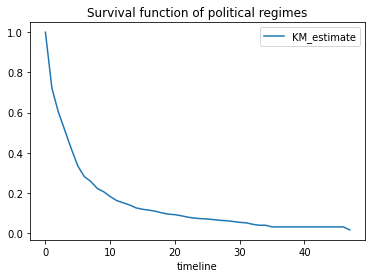

In [5]:
import pylab

kmf.survival_function_.plot()
pylab.title('Survival function of political regimes');

<AxesSubplot:xlabel='timeline'>

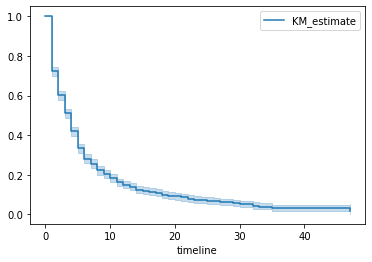

In [6]:
kmf.plot_survival_function()

In [7]:
kmf.median_survival_time_

4.0

In [8]:
from lifelines.utils import median_survival_times
median_ci = median_survival_times(kmf.confidence_interval_)
median_ci

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.5,3.0,4.0


Text(0.5, 1.0, 'Lifespans of different global regimes')

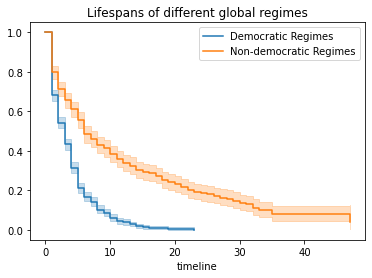

In [9]:
ax = pylab.subplot(111)

dem = (data["democracy"] == "Democracy")

kmf.fit(T[dem], event_observed=E[dem], label="Democratic Regimes")
kmf.plot_survival_function(ax=ax)

kmf.fit(T[~dem], event_observed=E[~dem], label="Non-democratic Regimes")
kmf.plot_survival_function(ax=ax)

pylab.title("Lifespans of different global regimes")

Text(0.5, 1.0, 'Lifespans of different global regimes')

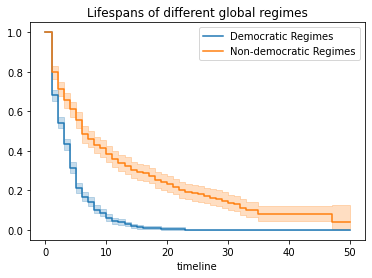

In [10]:
ax = pylab.subplot(111)

t = pylab.linspace(0, 50, 51)
kmf.fit(T[dem], event_observed=E[dem], timeline=t, label="Democratic Regimes")
ax = kmf.plot_survival_function(ax=ax)

kmf.fit(T[~dem], event_observed=E[~dem], timeline=t, label="Non-democratic Regimes")
ax = kmf.plot_survival_function(ax=ax)

pylab.title("Lifespans of different global regimes")

In [12]:
from lifelines.statistics import logrank_test

results = logrank_test(T[dem], T[~dem], E[dem], E[~dem], alpha=.99)

results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         260.47 <0.005    192.23

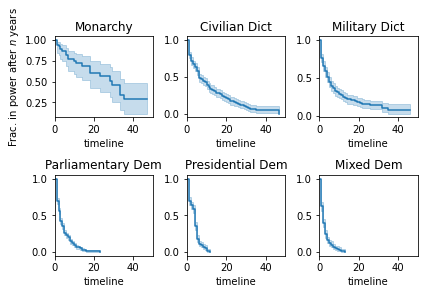

In [13]:
regime_types = data['regime'].unique()

for i, regime_type in enumerate(regime_types):
    ax = pylab.subplot(2, 3, i + 1)

    ix = data['regime'] == regime_type
    kmf.fit(T[ix], E[ix], label=regime_type)
    kmf.plot_survival_function(ax=ax, legend=False)

    pylab.title(regime_type)
    pylab.xlim(0, 50)

    if i==0:
        pylab.ylabel('Frac. in power after $n$ years')

pylab.tight_layout()

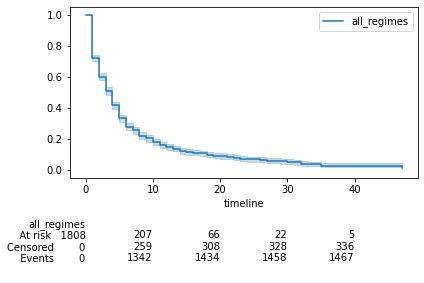

In [14]:
kmf = KaplanMeierFitter().fit(T, E, label="all_regimes")
kmf.plot_survival_function(at_risk_counts=True)
pylab.tight_layout()